In [31]:
# %% Importar librerías
import torch
import numpy as np
from transformers import ViTForImageClassification, ViTImageProcessor
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [32]:

# %% Ruta al modelo guardado
model_path = './resultsVit4classesLast'

# Cargar el modelo y el procesador
model = ViTForImageClassification.from_pretrained(model_path)
model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
feature_extractor = ViTImageProcessor.from_pretrained(model_path)



In [33]:
# Cargar el dataset
ds = load_dataset("C:/Thesis/Dataset4classes2", num_proc=3)
dataset_test = ds['test']



Resolving data files:   0%|          | 0/45388 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/600 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1150 [00:00<?, ?it/s]

In [34]:

# %% Función para predecir el dataset imagen por imagen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


2 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
1 0
2 0
3 0
0 0
0 0
2 0
0 0
0 0
2 0
0 0
0 0
2 0
2 0
0 0
3 0
2 0
0 0
2 0
2 0
2 0
2 0
2 0
2 0
0 0
2 0
0 0
0 0
2 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
3 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
1 0
2 0
0 0
2 0
0 0
0 0
0 0
2 0
2 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0


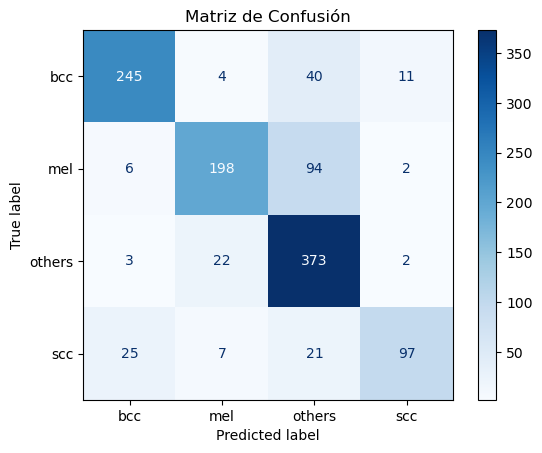

: 

In [36]:
def predict_image_by_image(model, dataset):
    model.eval()
    predictions = []
    labels = []
    
    with torch.no_grad():
        for example in dataset:
            # Transformar la imagen en el ciclo
            inputs = feature_extractor(example['image'], return_tensors='pt').to(device)
            pixel_values = inputs['pixel_values']
            label = example['label']

            # Realizar predicción
            outputs = model(pixel_values=pixel_values)
            logits = outputs.logits
            pred_class = torch.argmax(logits, dim=-1).item()

            # Guardar predicción y etiqueta
            predictions.append(pred_class)
            labels.append(label)
            print(pred_class, label)
    
    return predictions, labels

# %% Predecir y calcular métricas
predicted_classes, true_labels = predict_image_by_image(model, dataset_test)

# Calcular matriz de confusión
cm = confusion_matrix(true_labels, predicted_classes)
labels_names = ds['train'].features['label'].names  # Nombres de las clases

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_names)
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión")
plt.show()
